In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/data3.csv',delimiter=',',encoding='latin-1')
df.head()

,Sentence,Sentiment
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral


In [ ]:
df.shape

(5842, 2)

# Data preprocessing

In [ ]:
pd.set_option('display.max_colwidth', None)
messages = df[['Sentence','Sentiment']]
messages.columns = ["text", "label"]
messages.head()

,text,label
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral


In [ ]:
import gensim
messages['text_clean_gensim'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x,deacc=True))
messages.head()

,text,label,text_clean_gensim
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive,"[the, geosolutions, technology, will, leverage, benefon, gps, solutions, by, providing, location, based, search, technology, communities, platform, location, relevant, multimedia, content, and, new, and, powerful, commercial, model]"
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative,"[esi, on, lows, down, to, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive,"[for, the, last, quarter, of, componenta, net, sales, doubled, to, eur, from, eur, for, the, same, period, year, earlier, while, it, moved, to, zero, pre, tax, profit, from, pre, tax, loss, of, eur]"
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral,"[according, to, the, finnish, russian, chamber, of, commerce, all, the, major, construction, companies, of, finland, are, operating, in, russia]"
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral,"[the, swedish, buyout, firm, has, sold, its, remaining, percent, stake, almost, eighteen, months, after, taking, the, company, public, in, finland]"


In [ ]:
messages['label']=messages['label'].map({'negative':1,'positive':0,'neutral':0})

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (messages['text_clean_gensim'], messages['label'] , test_size=0.2,random_state=42)

In [ ]:
X_test=X_test.reset_index(drop=True)
X_test.head()

0                                      [few, employees, would, remain, at, the, oulu, plant, in, support, functions, for, other, group, units]
1                                         [comparable, net, sales, are, expected, to, increase, more, than, in, in, line, with, group, target]
2                                                                                 [tesla, is, recalling, model, cars, https, co, bkvstl, tsla]
3    [finnish, software, developer, done, solutions, oyj, said, its, net, profit, increased, to, mln, euro, mln, in, from, mln, euro, mln, in]
4                                              [compagnie, de, financement, foncier, is, to, issue, benchmark, year, covered, deal, in, euros]
Name: text_clean_gensim, dtype: object

## Training  Word to Vector

In [ ]:
w2v_model = gensim.models.Word2Vec(X_train, min_count=1)

In [ ]:
words = w2v_model.wv.index2word  #word count

In [ ]:
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test])

<ipython-input-17-5540b7745640>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train])
<ipython-input-17-5540b7745640>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test])


In [ ]:
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

# Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
  
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train_vect_avg, y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics
y_pred = clf.predict(X_train_vect_avg) 
metrics.accuracy_score(y_pred, y_train)
print('Accuracy Score:\n',metrics.accuracy_score(y_pred,y_train))
print('Confusion Matrix:\n',metrics.confusion_matrix(y_pred,y_train))
print('Precision Score:\n',metrics.precision_score(y_pred,y_train))

Accuracy Score:
 0.9270276053926814
Confusion Matrix:
 [[3923  276]
 [  65  409]]
Precision Score:
 0.5970802919708029


In [ ]:
from sklearn import metrics
y_pred = clf.predict(X_test_vect_avg) 
metrics.accuracy_score(y_pred, y_test)
print('Accuracy Score:\n',metrics.accuracy_score(y_test, y_pred))
print('recall score:\n',metrics.recall_score(y_test, y_pred))
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test, y_pred))
print('Precision Score:\n',metrics.precision_score(y_test,y_pred))

Accuracy Score:
 0.787852865697177
recall score:
 0.05142857142857143
Confusion Matrix:
 [[912  82]
 [166   9]]
Precision Score:
 0.0989010989010989


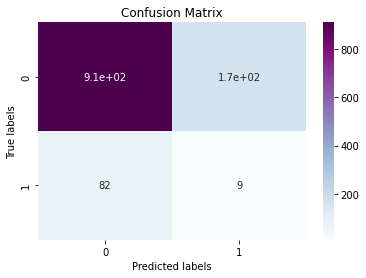

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_conf(y_pred,y_test):
    cf_matrix = metrics.confusion_matrix( y_pred,y_test)
    ax= plt.subplot()
    sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="BuPu")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    
plot_conf(y_pred,y_test) 